# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

PROBLEM: 

Predict salary of a person given features such as title, education, industry, experience, and distance from metropolis. 

Will ignore company ID to make the model more generalizable and not just restricted to a set of companies.

In [1]:
#libraries
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

__author__ = "Tehseen Niaz"
__email__ = "tehseenniaz@gmail.com"

os.listdir()

['.ipynb_checkpoints',
 'Salary Prediction Notebook.ipynb',
 'test_features.csv',
 'train_features.csv',
 'train_salaries.csv']

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
# Load the data into a pandas dataframe

full_data = pd.read_csv("train_features.csv")
full_salary_data = pd.read_csv('train_salaries.csv')

print(full_data.shape) # million observations, eight features
print(full_salary_data.shape) # million rows, two features

(1000000, 8)
(1000000, 2)


### ---- 3 Clean the data ----

In [3]:
# Look at ALL the data for duplication, invalid data (e.g. salaries <=0), or corrupt data and remove it

print("Null Values:\n", full_data.isnull().sum(), '\n') # No Null values
print("NA Values:\n", full_data.isna().sum(), '\n') # No NA values
print("Duplicates:", full_data.duplicated().sum(), '\n') # No duplicated rows

Null Values:
 jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64 

NA Values:
 jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64 

Duplicates: 0 



,salary
count,999995.000000
mean,116.062398
std,38.717163
min,17.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


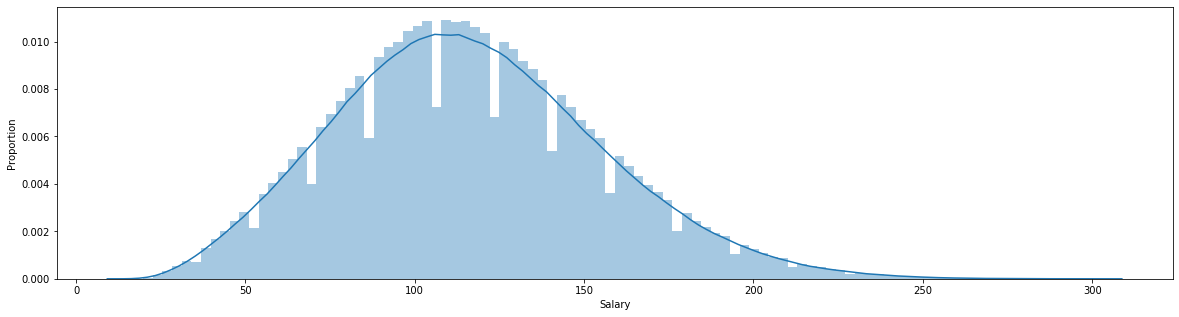

In [36]:
# check full salary data for invalid values and remove it

# typical salary distribution - bell curve with right-tail skew
plt.figure (figsize = (20,5))
sns.distplot(full_salary_data['salary'], bins=100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Proportion', fontsize=10)
plt.xlabel('Salary', fontsize=10)

# summary stats of salaries
pd.DataFrame(full_salary_data['salary'].describe())
# no illogical values except zero salaries

In [3]:
# Drop zero salary rows
zero = full_salary_data[full_salary_data.salary==0]
zero.shape # Five rows with zero salary

# drop the 5 rows from the full data based on the index of salary data
full_data.drop(zero.index, inplace=True)
full_data.shape # Five rows deleted

# drop the rows from salary data as well
full_salary_data.drop(zero.index, inplace=True)
full_salary_data.shape # Five rows dropped

(999995, 2)

#### Create training and testing sets for further data analysis and model building

In [4]:
from sklearn.model_selection import train_test_split

features, test_features, salaries, test_salaries = train_test_split(full_data, full_salary_data, test_size=0.25, random_state=4)

# drop jobId in all sets
features.drop('jobId', axis=1, inplace=True)
test_features.drop('jobId', axis=1, inplace=True)
salaries.drop('jobId', axis=1, inplace=True)
test_salaries.drop('jobId', axis=1, inplace=True)

# drop companyId in features sets
features.drop('companyId', axis=1, inplace=True)
test_features.drop('companyId', axis=1, inplace=True)

print(features.shape)
print(test_features.shape)
print(salaries.shape)
print(test_salaries.shape)

(749996, 6)
(249999, 6)
(749996, 1)
(249999, 1)


C:\Users\tniaz\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### ---- 4 Explore the data (EDA) ----

### 4.1 Explore each categorical feature

##### Check JobType

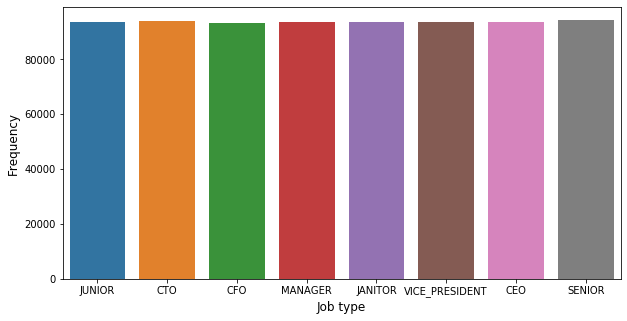

In [9]:
plt.figure (figsize = (10,5))
sns.countplot(features['jobType'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Job type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
# Job type seems evenly distributed and alright

##### Check Degree

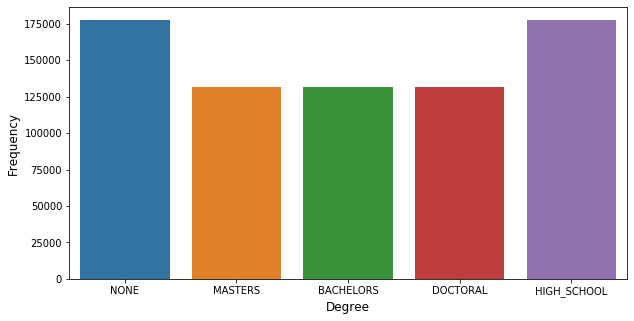

In [8]:
plt.figure (figsize = (10,5))
sns.countplot(features['degree'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
# No apparent concerns

##### Check Major

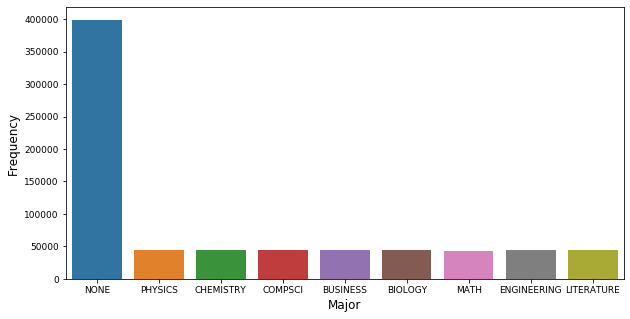

In [11]:
plt.figure (figsize = (10,5))
sns.countplot(features['major'])
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Major', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
# Looks consistent because most people had no university education so "None" being the mode makes sense

##### Check Industry

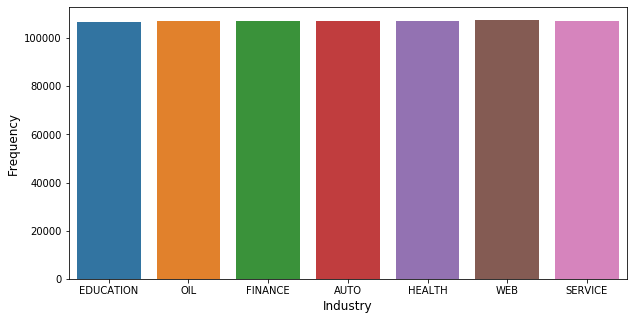

In [12]:
plt.figure (figsize = (10,5))
sns.countplot(features['industry'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
# Very evenly distributed - looks fine

##### Check yearsExperience

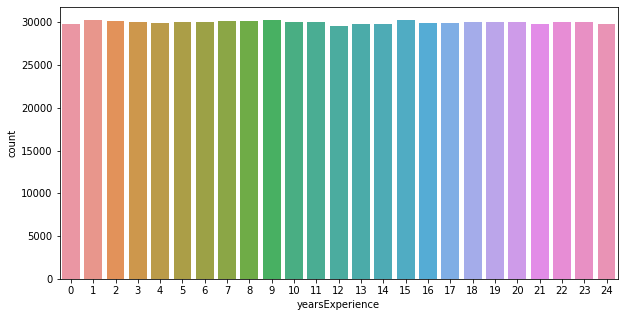

In [14]:
plt.figure (figsize = (10,5))
sns.countplot(features['yearsExperience'])
# Evenly distributed with no apparent concerns

##### Check Distance

99

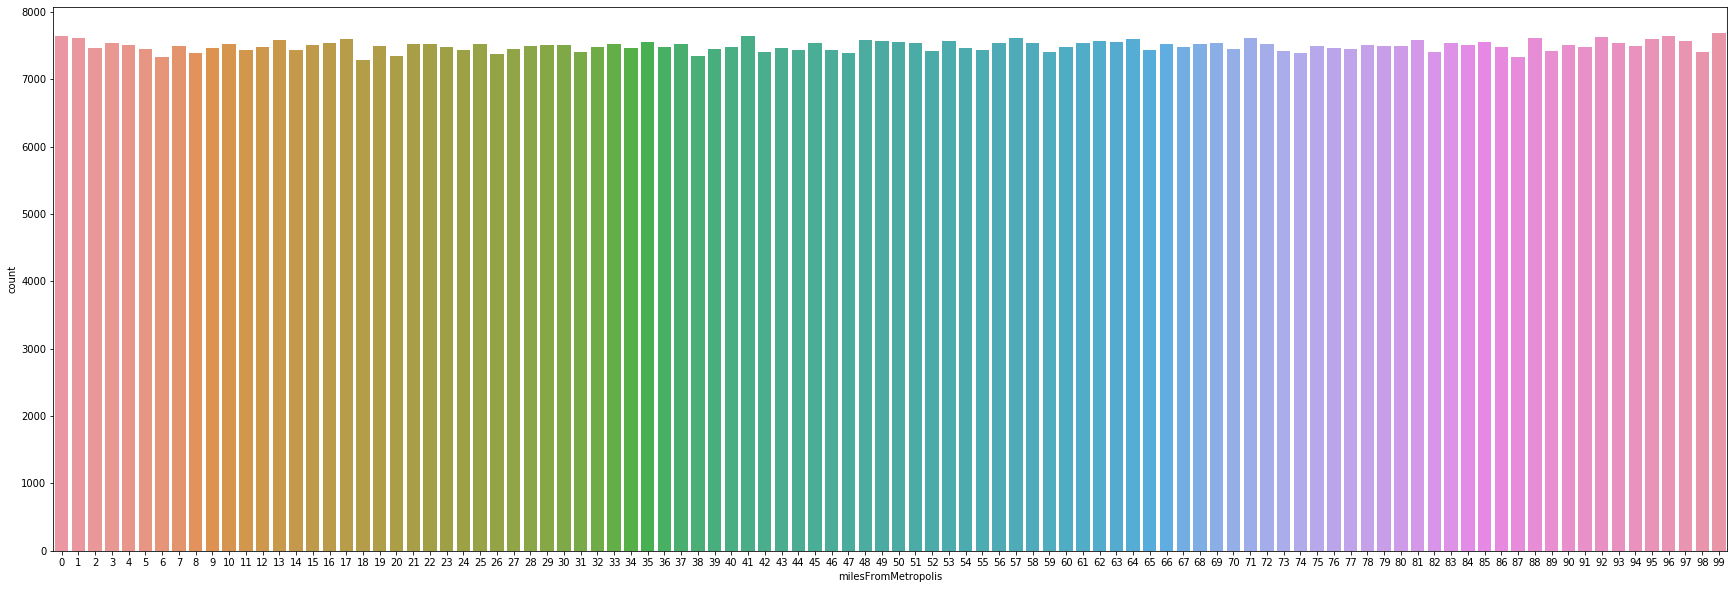

In [15]:
plt.figure (figsize = (30,10))
sns.countplot(features['milesFromMetropolis'])
df['milesFromMetropolis'].max()
# Assuming metropolis means downtown, a bit strange that many people live over 90 miles away from it
# But not impossible because suburbs can be 10-50 miles beyond the city limits and the city borders can be another 50 miles from downtown

### 4.2 Evaluate each categorical feature against Salary

In [5]:
# function for comparing categorical features against Salary
def salary_by_feature(feature):
    viz_df = features
    viz_df['Salary'] = salaries['salary'] # Appending salaries to df for easier EDA
    sns.set(style="ticks")
    g = sns.catplot(x=feature, y='Salary', data=viz_df, kind='box')
    g.fig.set_figwidth(15)
    g.fig.set_figheight(7)

#### JobType vs Salary

C:\Users\tniaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


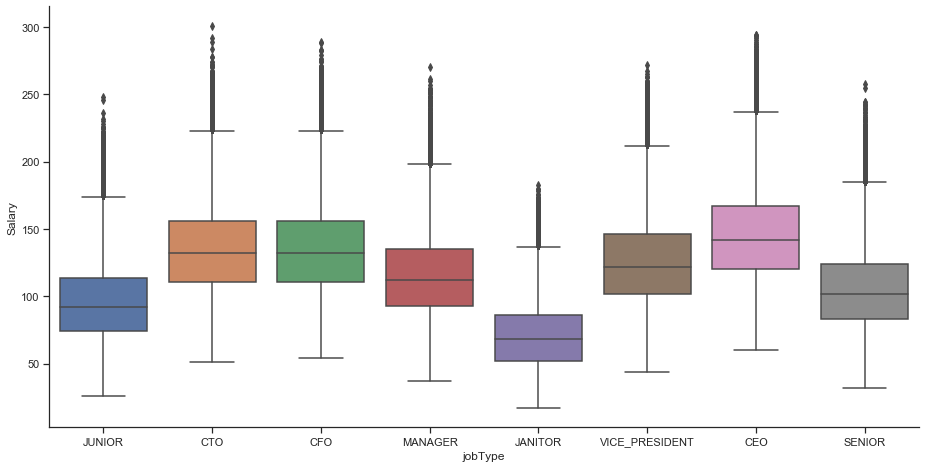

In [28]:
salary_by_feature('jobType')
# Salary median varies by jobType, so it is potentially a good predictor

# Two issues to investigate:
# 1. Many observations are beyond the inter-quartile ranges, so we should check how many to ensure data is believable
# 2. Many janitors earn over 100k, so it should be checked for data accuracy

In [9]:
# Checking how many observations are above 200k (~1.5 times the inter-quartile range) 
above_200 = features['Salary'] > 200
above_200.value_counts()
# Over 16k out of 750k earn over 200k, which is about 2%, and quite alright

False    733227
True      16769
Name: Salary, dtype: int64

degree   HIGH_SCHOOL   NONE
jobType                    
JANITOR        46749  47013 

major     NONE
jobType       
JANITOR  93762


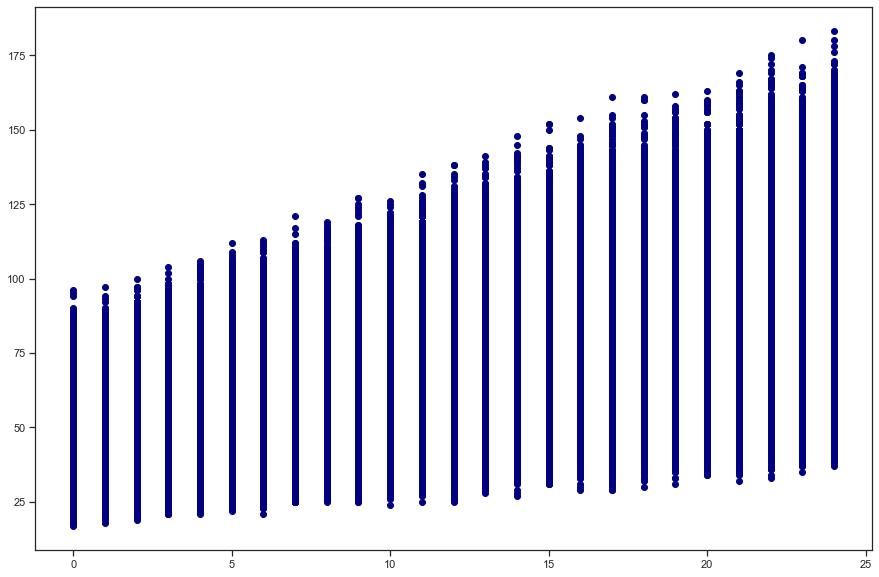

In [10]:
# Checking Janitor data because many janitors are earning well over 100k
janitor = features[features['jobType']=='JANITOR']
plt.figure(figsize = (15,10))
plt.scatter(x='yearsExperience', y='Salary', data=janitor, color='navy')
# more experienced janitors earn more so data is consistent

janitor_degree_cross = pd.crosstab(janitor['jobType'], janitor['degree'])
janitor_major_cross = pd.crosstab(janitor['jobType'], janitor['major'])

print(janitor_degree_cross, '\n')
print(janitor_major_cross)
# No janitor has a degree or major so no wrong input of data either

#### Degree vs Salary

C:\Users\tniaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


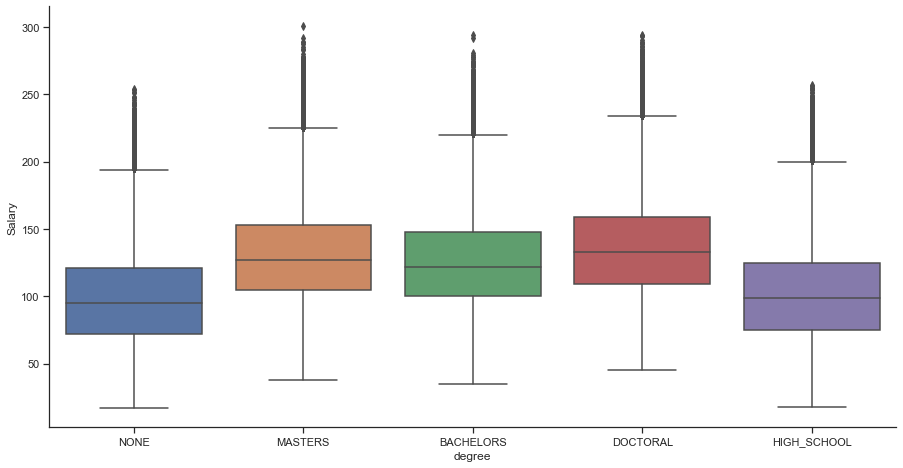

In [6]:
salary_by_feature('degree')
# Higher education yields higher pay which makes sense

#### Major vs Salary

C:\Users\tniaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


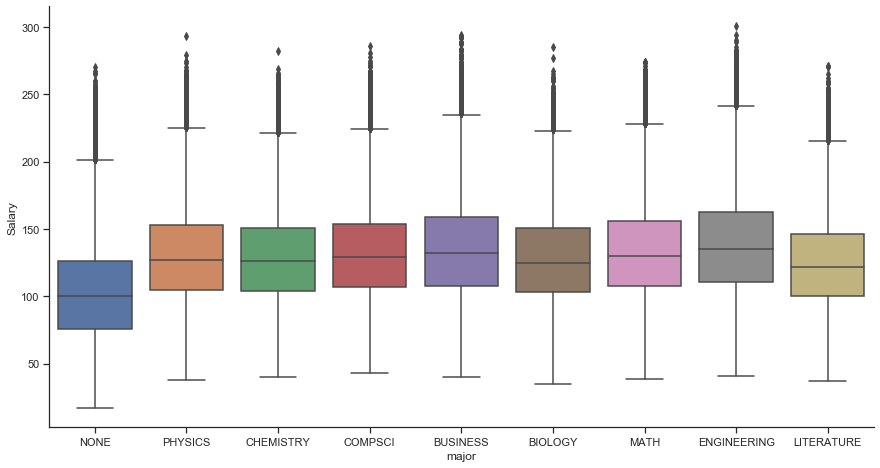

In [12]:
salary_by_feature('major')
# not a whole lot of variation in salary across majors given most are STEM

#### Industry vs Salary

C:\Users\tniaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


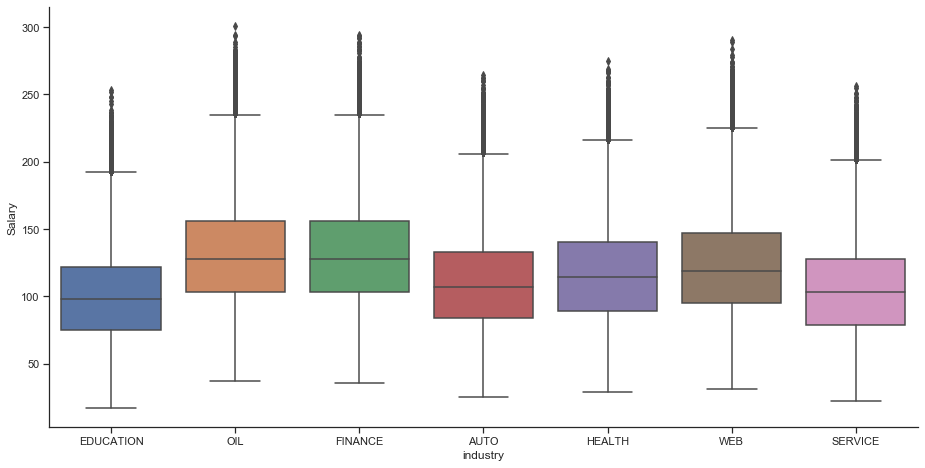

In [13]:
salary_by_feature('industry')
# palpable variation across industry as well where oil and finance stand out

### 4.3 -- Evaluate numeric features against Salary

,yearsExperience,milesFromMetropolis,Salary
yearsExperience,1.000000,-0.000103,0.374648
milesFromMetropolis,-0.000103,1.000000,-0.298686
Salary,0.374648,-0.298686,1.000000


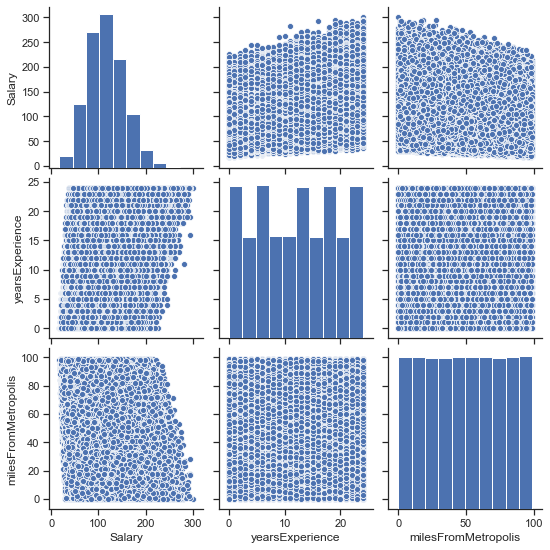

In [14]:
# Visual will take a few moments
sns.pairplot(features, vars=['Salary', 'yearsExperience', 'milesFromMetropolis'])

# Since there's no curvature in the plots, measuring linear association with correlation is appropriate
features.corr()
# Salary is higher with more experience
# Salary is lower as distance from metropolis increases
# Experience and distance have almost no correlation

### 4.4 -- Evaluate features amongst themselves --

##### Almost all categories are evenly distributed in their bisections, no apparent concerns

In [23]:
job_degree_cross = pd.crosstab(features.jobType, features.degree)
job_degree_cross

degree,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,NONE
jobType,,,,,
CEO,18756,18897,18576,18749,18701
CFO,18693,18533,18705,18772,18547
CTO,18771,18627,18686,19110,18685
JANITOR,0,0,46749,0,47013
JUNIOR,18751,18777,18904,18652,18572
MANAGER,18765,18681,18631,18753,18781
SENIOR,19023,18954,18545,19060,18787
VICE_PRESIDENT,18819,18963,18893,18660,18455


In [15]:
job_major_cross = pd.crosstab(features.jobType, features.major)
job_major_cross

major,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
jobType,,,,,,,,,
CEO,6307,6235,6311,6384,6239,6289,6124,43528,6262
CFO,6338,6220,6297,6238,6259,6022,6246,43436,6194
CTO,6263,6295,6304,6317,6134,6387,6205,43687,6287
JANITOR,0,0,0,0,0,0,0,93762,0
JUNIOR,6100,6286,6295,6217,6339,6313,6226,43707,6173
MANAGER,6229,6176,6204,6164,6323,6415,6183,43585,6332
SENIOR,6360,6331,6357,6339,6437,6397,6191,43603,6354
VICE_PRESIDENT,6268,6321,6320,6137,6355,6239,6283,43634,6233


In [316]:
job_ind_cross = pd.crosstab(features.jobType, features.industry)
job_ind_cross

industry,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
jobType,,,,,,,
CEO,13400,13369,13405,13222,13491,13306,13486
CFO,13300,13230,13364,13430,13216,13275,13435
CTO,13274,13459,13365,13279,13641,13401,13460
JANITOR,13625,13362,13315,13341,13256,13364,13499
JUNIOR,13433,13356,13344,13502,13130,13427,13464
MANAGER,13514,13316,13395,13308,13390,13370,13318
SENIOR,13309,13481,13476,13459,13610,13638,13396
VICE_PRESIDENT,13338,13269,13404,13610,13403,13302,13464


In [317]:
degree_major_cross = pd.crosstab(features.degree, features.major)
degree_major_cross

major,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
degree,,,,,,,,,
BACHELORS,14709,14587,14769,14706,14836,14566,14379,14579,14447
DOCTORAL,14622,14606,14605,14419,14550,14763,14573,14748,14546
HIGH_SCHOOL,0,0,0,0,0,0,0,177689,0
MASTERS,14534,14671,14714,14671,14700,14733,14506,14385,14842
NONE,0,0,0,0,0,0,0,177541,0


In [318]:
deg_ind_cross = pd.crosstab(features.degree, features.industry)
deg_ind_cross

industry,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
degree,,,,,,,
BACHELORS,18887,18788,18826,18677,18743,18791,18866
DOCTORAL,18875,18713,18912,18781,18822,18536,18793
HIGH_SCHOOL,25245,25400,25252,25492,25472,25185,25643
MASTERS,18709,18669,18813,18854,18793,18914,19004
NONE,25477,25272,25265,25347,25307,25657,25216


In [45]:
major_ind_cross = pd.crosstab(features.industry, features.major)
major_ind_cross

major,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
industry,,,,,,,,,
AUTO,6192,6224,6423,6213,6332,6370,6219,56948,6272
EDUCATION,6274,6372,6223,6256,6235,6225,6153,56909,6195
FINANCE,6183,6377,6324,6271,6341,6365,6280,56735,6192
HEALTH,6348,6222,6281,6271,6206,6230,6196,57069,6328
OIL,6256,6188,6294,6216,6255,6316,6264,57112,6236
SERVICE,6350,6339,6238,6210,6406,6143,6054,57052,6291
WEB,6262,6142,6305,6359,6311,6413,6292,57117,6321


### ---- 5 Establish a baseline ----

In [5]:
# One hot encode categorical features for appropriate linear model input
features = pd.get_dummies(features)
features.shape

(749996, 31)

In [6]:
# transform testing data
test_features = pd.get_dummies(test_features)
test_features.shape

(249999, 31)

In [7]:
# Drop the excluded group in each category to form a basis of comparison in regression
predictors = features.drop(['jobType_JANITOR', 'degree_NONE', 'major_NONE', 'industry_SERVICE'], axis=1)
predictors.shape

test_features.drop(['jobType_JANITOR','degree_NONE','major_NONE', 'industry_SERVICE'], axis=1, inplace=True)
salary_data = salaries['salary']

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

'''
estimator_cv takes any estimator (Linear Regression, Decision Tree Regressor, etc.)
and use k-fold cross-validation to score the performance of the estimator across the k folds.
It returns the individual and average scores of the k folds.

'''

def estimator_cv(estimator, cv, data, target, scoring):
    scores = cross_val_score(estimator, X=data, y=target, cv=cv, scoring=scoring)
    scores = abs(scores) # MSE scoring is negative in cross_val_score
    avg_scores = np.mean(scores)
    print("avg_score:", avg_scores,'\n', "scores:", scores)

In [52]:
# Creating and evaluating baseline regression model
OLS_mse = estimator_cv(LinearRegression(), cv=5, data=predictors, target=salary_data, scoring='neg_mean_squared_error')
OLS_mse

OLS_r2 = estimator_cv(LinearRegression(), cv=5, data=predictors, target=salary_data, scoring='r2')
OLS_r2

avg_score: 384.7288188645689 
 scores: [385.65070307 382.65285187 385.1872413  385.23038853 384.92290956]
avg_score: 0.7438018558738291 
 scores: [0.74380737 0.7446325  0.74382098 0.74302583 0.7437226 ]


##### The average MSE of the baseline model is about 385

##### The average R2 of the baseline model is about 0.744

### Now testing on completely unseen data

In [19]:
# predicting and scoring on test data
OLS = LinearRegression().fit(predictors, salary_data) # train model on 750k observations
preds_OLS = OLS.predict(test_features) # testing on 250k values
print("R2:", OLS.score(test_features, test_salaries))
print("MSE:", mean_squared_error(test_salaries, preds_OLS))

R2: 0.7428312259452836
MSE: 383.4377938102359


#### Results on completely unseen data are consistent with those in 5-fold CV, so the model is stable and generalizable

### ---- 6 Hypothesize solution ----

In [25]:
#brainstorm 3 models that you think may improve results over the baseline model

# Linear Regression with interaction terms
# XGBoost / Adaboost
# Boosted Random Forest
# Stacking

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [54]:
predictors.columns

Index(['yearsExperience', 'milesFromMetropolis', 'jobType_CEO', 'jobType_CFO',
       'jobType_CTO', 'jobType_JUNIOR', 'jobType_MANAGER', 'jobType_SENIOR',
       'jobType_VICE_PRESIDENT', 'degree_BACHELORS', 'degree_DOCTORAL',
       'degree_HIGH_SCHOOL', 'degree_MASTERS', 'major_BIOLOGY',
       'major_BUSINESS', 'major_CHEMISTRY', 'major_COMPSCI',
       'major_ENGINEERING', 'major_LITERATURE', 'major_MATH', 'major_PHYSICS',
       'industry_AUTO', 'industry_EDUCATION', 'industry_FINANCE',
       'industry_HEALTH', 'industry_OIL', 'industry_WEB'],
      dtype='object')

---------------------------------------------------------------------------------------------------
### Interactions justifications:

#### JobType * Industry
CFO in finance industry should earn more than a CFO in education, which means that the effect of job type on salary depends on industry

#### JobType * Degree --- | --- JobType * Major
A CTO with literature major ought to earn differently from a CTO with computer science major

#### JobType * yearsExperience
25 years of experience as a janitor ought to be different from same experience as a senior

#### yearsExperience * Degree --- | --- yearsExperience * Major
Experience is also substituted for level and relevance of education, so effect of experience on salary also depends on education

#### yearsExperience * Industry
Experience in one industry might be differently rewarded from another

#### Industry * Degree --- | --- Industry * Major
Differnet industries ought to reward different education levels and majors differently

#### Degree * Major
Finance Master's ought to earn more than just Finance Bachelor's

#### milesFromMetropolis * JobType
Long commute times can affect job performance so similar job types might earn differently due to distance

#### milesFromMetropolis * Degree -- | -- milesFromMetropolis * Major
Those who can afford living in the metropolis might have better resources to pursue higher education and STEM subjects that pay more

#### milesFromMetropolis * Industry
Those who live in suburbs might be more likely to choose the Education industry which is closer than working in the downtown in the financial district

#### milesFromMetropolis * Experience
Similar years of experience might be rewarded differently due to quality of performance impacted by distance

#### We have JobType, yearsExperience, milesFromMetropolis, industry, degree, and major all interacting with each other
----------------------------------------------------------------------------------------------------

In [16]:
# Creating interaction variables
from sklearn.preprocessing import PolynomialFeatures

interactions = PolynomialFeatures(interaction_only=True, include_bias=False)
df_interactions = interactions.fit_transform(predictors)
df_interactions = pd.DataFrame(df_interactions)
df_interactions.shape

(749996, 378)

##### These are many variables, but given that the data is quite balanced across all subcategories, we will have roughly 2000 data points for each variable

### ---- 8 Create and evaluate models ----

#### Model 1: Linear Regression with interactions

In [70]:
# This will take SEVERAL minutes
MSE_interaction = estimator_cv(LinearRegression(), cv=5, data=df_interactions, target=salary_data, scoring='neg_mean_squared_error')
MSE_interactions

r2_interaction = estimator_cv(LinearRegression(), cv=5, data=df_interactions, target=salary_data, scoring='r2')
r2_interaction

MSE: {'scores': array([354.27219516, 352.78020004, 354.2077984 , 354.47079198,
       355.12167213]), 'avg_score': 354.17053154036404} 

R-squared: {'scores': array([0.76465251, 0.76456833, 0.76442469, 0.76354452, 0.76356393]), 'avg_score': 0.7641507953360925}


##### Average MSE with interactions is 354 (down from 384 in the baseline model) while average R-squared is about 0.765 (little up from 0.74)

#### Model 2: Boosted Random Forest

In [92]:
# model here
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
learning_rate = np.linspace(start = 0.1, stop = 1.0, num = 10)
loss_function = ['linear', 'exponential', 'square']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'loss': loss_function}

abr = AdaBoostRegressor(n_estimators=10)
rfr = RandomForestRegressor(n_estimators=25, max_depth=50, max_features=0.5)
gbr = GradientBoostingRegressor(n_estimators=10) # features scaling?

#abr_random = RandomizedSearchCV(estimator=abr, param_distributions=random_grid, n_iter=50, cv=3, random_state=42)
# Fit the random search model
#abr_random.fit(predictors, salary_data)
#abr_random.best_score_

MSE_rfr = estimator_cv(rfr, cv=3, data=df_interactions, target=salary_data, scoring='neg_mean_squared_error')
MSE_rfr

avg_score: 450.29297110693943 
 scores: [449.6369808  450.14251314 451.09941938]


In [17]:
import lightgbm
print(lightgbm.__version__)

2.3.1


In [30]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror')
MSE_xgb = estimator_cv(xgb, cv=3, data=predictors, target=salary_data, scoring='neg_mean_squared_error')
MSE_xgb

avg_score: 361.15846159152596 
 scores: [360.38054886 361.56497744 361.52985848]


In [29]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

lgbm = LGBMRegressor()
MSE_lgbm = estimator_cv(lgbm, cv=5, data=predictors, target=salary_data, scoring='neg_mean_squared_error')
MSE_lgbm

avg_score: 357.6887584291189 
 scores: [357.83990281 356.19254976 357.70121304 357.88297595 358.82715058]


In [ ]:
# catboost
from catboost import CatBoostRegressor

cb = CatBoostRegressor()
MSE_cb = estimator_cv(cb, cv=3, data=predictors, target=salary_data, scoring='neg_mean_squared_error')
MSE_cb

Learning rate set to 0.117982
0:	learn: 36.7801175	total: 116ms	remaining: 1m 55s
1:	learn: 35.1580667	total: 156ms	remaining: 1m 17s
2:	learn: 33.6933172	total: 202ms	remaining: 1m 7s
3:	learn: 32.4690238	total: 240ms	remaining: 59.8s
4:	learn: 31.4331836	total: 277ms	remaining: 55.1s
5:	learn: 30.3943463	total: 310ms	remaining: 51.4s
6:	learn: 29.5276367	total: 350ms	remaining: 49.6s
7:	learn: 28.6774710	total: 391ms	remaining: 48.4s
8:	learn: 28.0151693	total: 442ms	remaining: 48.7s
9:	learn: 27.3850398	total: 481ms	remaining: 47.6s
10:	learn: 26.7889990	total: 516ms	remaining: 46.4s
11:	learn: 26.2768460	total: 553ms	remaining: 45.5s
12:	learn: 25.8176380	total: 610ms	remaining: 46.3s
13:	learn: 25.4108936	total: 653ms	remaining: 46s
14:	learn: 24.9436743	total: 691ms	remaining: 45.3s
15:	learn: 24.6046223	total: 726ms	remaining: 44.6s
16:	learn: 24.2910927	total: 771ms	remaining: 44.6s
17:	learn: 24.0163439	total: 838ms	remaining: 45.7s
18:	learn: 23.6731036	total: 893ms	remaining

### ---- 9 Test models on unseen data ----

#### Testing Linear Regression model

In [86]:
OLS.fit(df_interactions, salary_data)

test_features_inter = interactions.fit_transform(test_features)
test_features_inter = pd.DataFrame(test_features_inter)

preds_interactions = OLS.predict(test_features_inter) # testing on 250k values
print("R2:", OLS.score(test_features_inter, test_salaries))
print("MSE:", mean_squared_error(test_salaries, preds_interactions))
# Results on completely unseen data are consistent with those in 5-fold CV, so the model is stable
# The increased bias with addition of so many variables did not result by pure chance but by real explanatory power

R2: 0.7628933053563735
MSE: 353.5252995857336


#### Testing Tuned Random Forest

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data